k-Nearest Neighbors   KNN

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# 加載數據
data = pd.read_csv(r'C:\Users\isabe\Downloads\STORE_STATUS_PUBLIC_VIEW_-8827503165297490716.csv')

# 選擇特徵和目標變量
features = data[['x', 'y', 'Type']]  # 'x' 和 'y' 是地理位置的經緯度，'Type' 是商店類型
target = data['Online grocery pickup service offered']  # 目標變量

# 處理缺失值
features_clean = features.dropna()
target_clean = target[features_clean.index]

# 對類別型特徵進行編碼
label_encoder = LabelEncoder()
features_clean['Type_encoded'] = label_encoder.fit_transform(features_clean['Type'])
features_clean = features_clean.drop('Type', axis=1)

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(features_clean, target_clean, test_size=0.2, random_state=42)

# 特徵標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# 檢查 NaN 值
nan_in_x_train = X_train.isna().any().any()  # 檢查 X_train 是否含有 NaN
nan_in_y_train = y_train.isna().any()        # 檢查 y_train 是否含有 NaN

# 如果 X_train 或 y_train 中有 NaN 值，進行處理
if nan_in_x_train or nan_in_y_train:
    print("存在 NaN 值，需要進行處理。")
    
    # 可選擇的處理方法：
    # 方法1: 移除含有 NaN 的行
    X_train = X_train.dropna()
    y_train = y_train.loc[X_train.index]

    # 或者
    # 方法2: 使用填補方法，例如用平均值或中位數填補
    # X_train.fillna(X_train.mean(), inplace=True)
    # 對於 y_train，根據情況選擇合適的填補方法

# 確認處理後的數據
print("NaN 值處理後：")
print("X_train 中的 NaN 數量:", X_train.isna().sum().sum())
print("y_train 中的 NaN 數量:", y_train.isna().sum())


存在 NaN 值，需要進行處理。
NaN 值處理後：
X_train 中的 NaN 數量: 0
y_train 中的 NaN 數量: 113


In [6]:
# 移除 y_train 中 NaN 值對應的行
# 同時也從 X_train 中移除這些行
valid_indices = y_train.dropna().index
X_train = X_train.loc[valid_indices]
y_train = y_train.loc[valid_indices]

# 再次確認 NaN 值是否已被移除
print("重新檢查 NaN 值後：")
print("X_train 中的 NaN 數量:", X_train.isna().sum().sum())
print("y_train 中的 NaN 數量:", y_train.isna().sum())


重新檢查 NaN 值後：
X_train 中的 NaN 數量: 0
y_train 中的 NaN 數量: 0


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# 特徵標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 訓練 KNN 分類器
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 使用訓練好的模型進行預測
y_pred = knn.predict(X_test_scaled)


In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

# 檢查 y_test 和 y_pred 的類型
print("y_test 的類型:", y_test.dtype)
print("y_pred 的類型:", y_pred.dtype)

# 確保 y_test_encoded 是數字類型
if y_test.dtype != 'int':
    label_encoder = LabelEncoder()
    y_test_encoded = label_encoder.fit_transform(y_test)
else:
    y_test_encoded = y_test

# 確保 y_pred 也是相同的數字類型
if y_pred.dtype == 'object':
    y_pred = label_encoder.transform(y_pred)

# 再次嘗試進行模型評估
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
class_report = classification_report(y_test_encoded, y_pred)

# 輸出評估結果
print("混淆矩陣:")
print(conf_matrix)
print("\n分類報告:")
print(class_report)


y_test 的類型: object
y_pred 的類型: int32
混淆矩陣:
[[ 70 228   0]
 [122 612   0]
 [  2  23   0]]

分類報告:
              precision    recall  f1-score   support

           0       0.36      0.23      0.28       298
           1       0.71      0.83      0.77       734
           2       0.00      0.00      0.00        25

    accuracy                           0.65      1057
   macro avg       0.36      0.36      0.35      1057
weighted avg       0.59      0.65      0.61      1057



c:\Users\isabe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\isabe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\isabe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Due to the y_test is not available to read if is different type with y_pred so now consider to convert from object to int32

In [12]:
# 使用 LabelEncoder 轉換 y_test
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# 轉換 y_test_encoded 到 int32 類型
y_test_encoded = y_test_encoded.astype('int32')

# 驗證轉換後的類型
print("轉換後的 y_test_encoded 類型:", y_test_encoded.dtype)


轉換後的 y_test_encoded 類型: int32


In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# 使用 LabelEncoder 對 y_train 進行編碼
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# 試驗不同的 n_neighbors 值
for n in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, y_train_encoded)
    scores = cross_val_score(knn, X_train_scaled, y_train_encoded, cv=5)
    print(f"n_neighbors={n}, Cross-validated accuracy: {scores.mean()}")



n_neighbors=1, Cross-validated accuracy: 0.6062689761805513
n_neighbors=2, Cross-validated accuracy: 0.5303935220086741
n_neighbors=3, Cross-validated accuracy: 0.6398308366814189
n_neighbors=4, Cross-validated accuracy: 0.5909558821355613
n_neighbors=5, Cross-validated accuracy: 0.6473743026669386
n_neighbors=6, Cross-validated accuracy: 0.6152649052632201
n_neighbors=7, Cross-validated accuracy: 0.6568568497544737
n_neighbors=8, Cross-validated accuracy: 0.6322938747032547
n_neighbors=9, Cross-validated accuracy: 0.6595317705977479


Neighbor = 9 has the best accuracy so will condider to use this data

In [16]:
# 使用最佳的 n_neighbors 值訓練模型
knn_final = KNeighborsClassifier(n_neighbors=9)
knn_final.fit(X_train_scaled, y_train_encoded)

# 對測試集進行預測
y_pred_final = knn_final.predict(X_test_scaled)

# 使用測試集進行最終評估
final_conf_matrix = confusion_matrix(y_test_encoded, y_pred_final)
final_class_report = classification_report(y_test_encoded, y_pred_final)

print("最終混淆矩陣:")
print(final_conf_matrix)
print("\n最終分類報告:")
print(final_class_report)


最終混淆矩陣:
[[ 50 248   0]
 [ 98 636   0]
 [  3  22   0]]

最終分類報告:
              precision    recall  f1-score   support

           0       0.33      0.17      0.22       298
           1       0.70      0.87      0.78       734
           2       0.00      0.00      0.00        25

    accuracy                           0.65      1057
   macro avg       0.34      0.34      0.33      1057
weighted avg       0.58      0.65      0.60      1057



c:\Users\isabe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\isabe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\isabe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Line graph for demo the 9 times of the accuracy

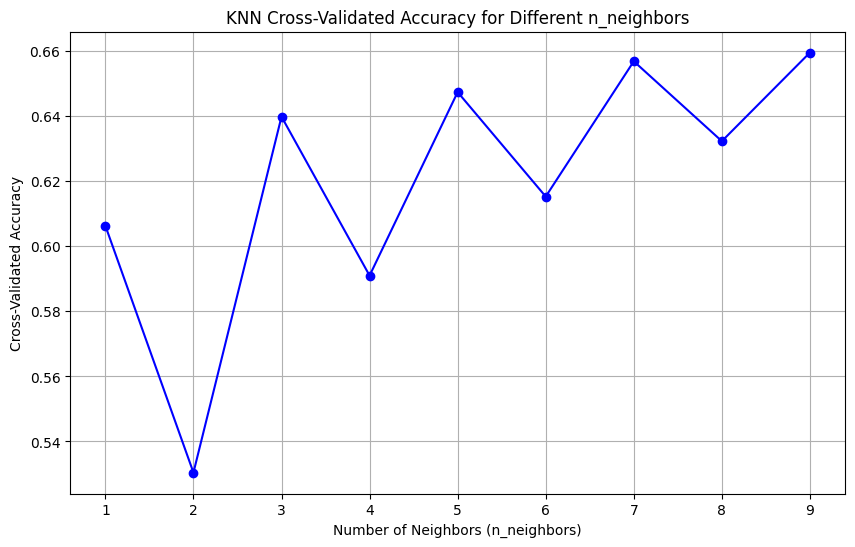

In [17]:
import matplotlib.pyplot as plt

neighbors = list(range(1, 10))
cross_val_accuracies = [0.6062689761805513, 0.5303935220086741, 0.6398308366814189, 
                        0.5909558821355613, 0.6473743026669386, 0.6152649052632201, 
                        0.6568568497544737, 0.6322938747032547, 0.6595317705977479]

plt.figure(figsize=(10, 6))
plt.plot(neighbors, cross_val_accuracies, marker='o', linestyle='-', color='b')
plt.title('KNN Cross-Validated Accuracy for Different n_neighbors')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(neighbors)
plt.grid(True)
plt.show()


Bar Chart - Classification report on the test set

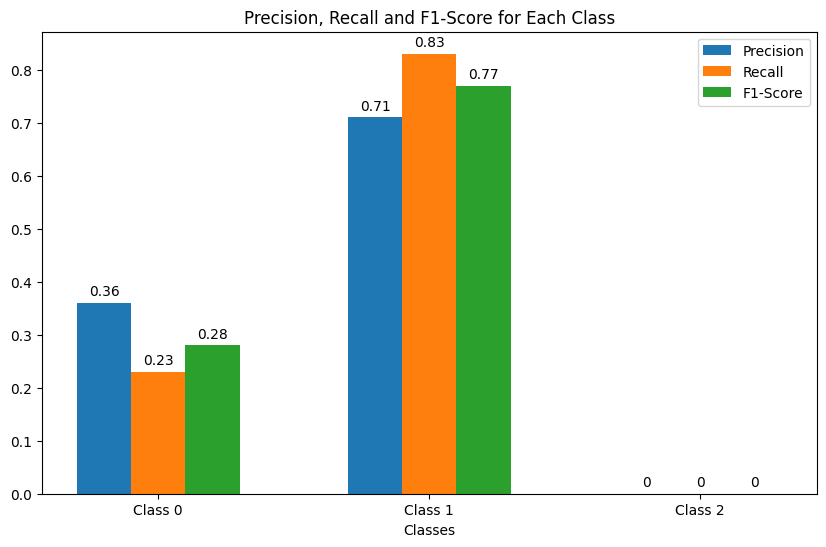

In [18]:
import numpy as np

# 假设这是从 classification_report 获取的数据
labels = ['Class 0', 'Class 1', 'Class 2']
precision = [0.36, 0.71, 0.00]  # 替换为实际值
recall = [0.23, 0.83, 0.00]     # 替换为实际值
f1_score = [0.28, 0.77, 0.00]   # 替换为实际值

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

ax.set_xlabel('Classes')
ax.set_title('Precision, Recall and F1-Score for Each Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

plt.show()
